number of particles 253
number of collisions 22862
0
number of particles 251
number of collisions 21037
1


<ipython-input-2-1e4f6a876b28>:252: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm1 = plt.pcolormesh(X, T, C0.T)


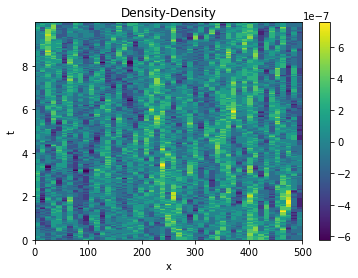

<ipython-input-2-1e4f6a876b28>:259: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm2 = plt.pcolormesh(X, T, C1.T)


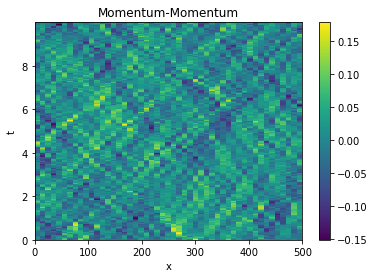

<ipython-input-2-1e4f6a876b28>:266: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm3 = plt.pcolormesh(X, T, C2.T)


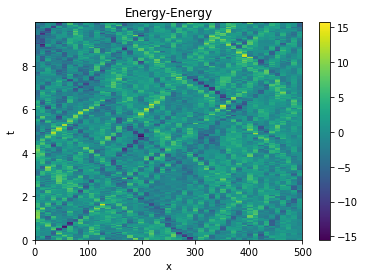

<ipython-input-2-1e4f6a876b28>:273: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm4 = plt.pcolormesh(X, T, C3.T)


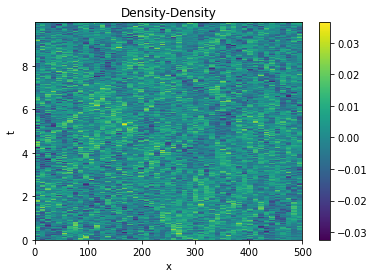

<ipython-input-2-1e4f6a876b28>:280: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm5 = plt.pcolormesh(X, T, C4.T)


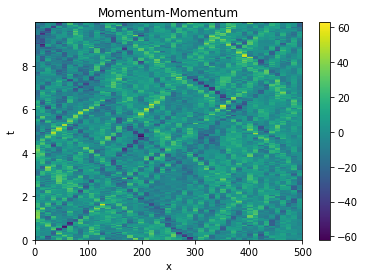

<ipython-input-2-1e4f6a876b28>:287: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm6 = plt.pcolormesh(X, T, C5.T)


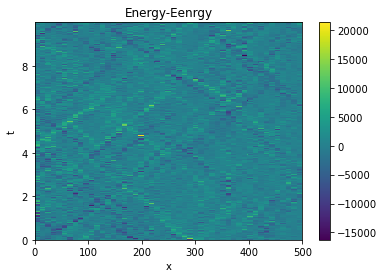

<ipython-input-2-1e4f6a876b28>:297: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm7 = plt.pcolormesh(X, T,np.abs(C0FT).T, vmin = 0, vmax = 20)


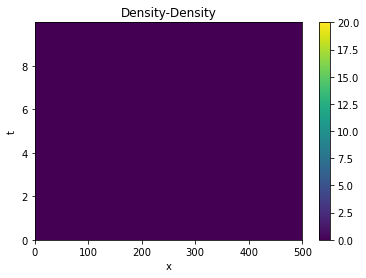

<ipython-input-2-1e4f6a876b28>:305: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm8 = plt.pcolormesh(X, T,np.abs(C0FT).T, vmin = 0, vmax = 20)


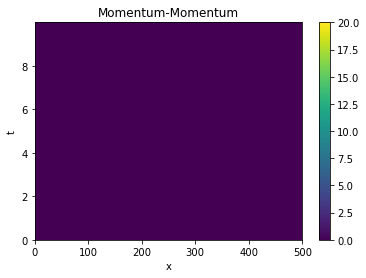

<ipython-input-2-1e4f6a876b28>:313: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm9 = plt.pcolormesh(X, T,np.abs(C0FT).T, vmin = 0, vmax = 20)


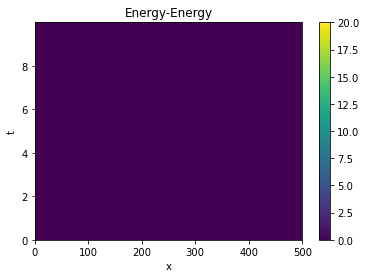

<ipython-input-2-1e4f6a876b28>:321: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm10 = plt.pcolormesh(X, T,np.abs(C0FT).T, vmin = 0, vmax = 20)


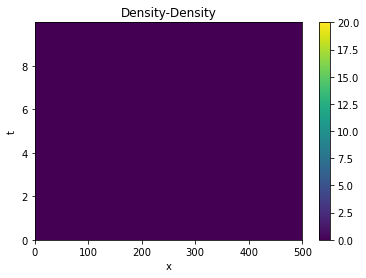

<ipython-input-2-1e4f6a876b28>:329: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm11 = plt.pcolormesh(X, T,np.abs(C0FT).T, vmin = 0, vmax = 20)


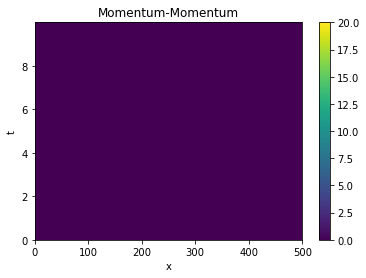

<ipython-input-2-1e4f6a876b28>:337: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm12 = plt.pcolormesh(X, T,np.abs(C0FT).T, vmin = 0, vmax = 20)


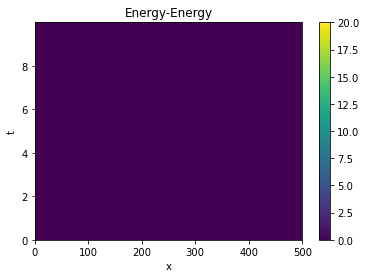

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
from matplotlib.animation import FuncAnimation
from numba import jit
from time import time
from numpy.random import random
from scipy.fft import fft2, fft, fftfreq
import os

class Molecular_Dynamics:
    def __init__(self, N, L, dt, t_max, x, v, m, delta=1):
        self.L = L
        self.t_max = t_max
        self.dt = dt
        self.m = m
        self.delta = delta
        self.x = x
        self.v = v
        self.x_data = [x]
        self.v_data = [v]
        self.t = [0]
        self.pair_idx = tuple((i, i+1) for i in range(N-1))   # pair index 
        self.single_idx = (0, N-1)
        self.number_of_events = 0
        
        
    def simulation(self): 
        while self.t[-1] < t_max:
            t_event, event_idx = self.compute_next_event()
            for i in range(int(self.t[-1]/self.dt)+1, int((self.t[-1]+t_event)/dt)+1):
                self.x = np.copy(self.x + self.v * self.dt)
                self.x_data.append(self.x)
                self.v_data.append(self.v)
                self.t.append(self.t[-1] + self.dt)
                if self.t[-1] >= self.t_max: break
            self.update_v(event_idx)
            self.number_of_events += 1
            
    def get_data(self, p):
        x_data = np.array(self.x_data)[:-1]  
        v_data = np.array(self.v_data)[:-1]  
        E_data = 0.5 * self.m * v_data**2
        t = np.array(self.t)[:-1]
        if p: print("number of collisions", self.number_of_events)
        return x_data, v_data, E_data, t
        
    def pair_time(self, xi, xj, vi, vj):
        dv = vi - vj
        if dv < 0: return np.inf
        return (xj - xi - self.delta)/dv
    
    def pair_collision(self, vi, vj, mi, mj):
        vi_f = vi*(mi-mj)/(mi+mj) + vj*2*mj/(mi+mj)
        vj_f = vi*2*mi/(mi+mj) - vj*(mi-mj)/(mi+mj)
        return vi_f, vj_f
    
    def wall_time(self, x0, xN, v0, vN):
        t0 = (x0 - self.delta/2)/abs(v0) if v0 < 0 else np.inf
        tn = (L - xN - self.delta/2)/vN if vN > 0 else np.inf
        return [t0, tn]
    
    def wall_collision(self, vi):
        return -vi
    
    def compute_next_event(self):
        x, v = self.x, self.v
        pair_times = [self.pair_time(x[i], x[j], v[i], v[j]) for i, j in self.pair_idx]
        wall_times = self.wall_time(x[0], x[-1], v[0], v[-1])
        times = np.array(wall_times + pair_times)
        arg = np.argmin(times)
        t_event = times[arg]
        event_idx = self.single_idx[arg] if arg < 2 else self.pair_idx[arg-2]
        return t_event, event_idx
    
    def update_v(self, event_idx):
        v = self.v.copy()
        if type(event_idx) == tuple:
            i, j = event_idx # i and the i+1 element pair(i,j)
            v[i], v[j] = self.pair_collision(v[i], v[j], m[i], m[j])
        else:
            i = event_idx
            v[i] = self.wall_collision(v[i])
        self.v = v
        
class Monte_Carlo:
    def __init__(self, L, delta = 1, T=1):
        self.L = L # length of simulation box
        self.delta = delta # size of the particles
        self.T = T # temperature 
        
    def sample_configuration(self):
        x,m = self.sample_positions()
        N = len(x)
        v = self.sample_velocities(N, m)
        print('number of particles', N)
        return x, v, m
   
    def sample_velocities(self, N, m):
        k_b = 1.38064
        sigma = np.sqrt((k_b * self.T)/m)
        v = np.random.normal(loc = 0, scale = sigma, size=N)
        return v
    
    def sample_positions(self):
        x_positions = []
        m = np.array([])
        next_position = 0.5 + np.random.poisson(2)
        i = 0
        m1 = 1
        m2 = 5
        while next_position < self.L - 0.5:
            if i%2 == 0:
                m = np.append(m,m1)
            else:
                m = np.append(m,m2)
            if next_position < self.L - 0.5:
                x_positions.append(next_position)
                next_position = x_positions[-1] + 1 + np.random.poisson(1)
            i = i+1
        return x_positions, m
    
def observables(nbins, x_data, v_data, E_data, m, N):
    x_grid = np.linspace(0, L, nbins)
    dx = x_grid[1]
    
    enumerate(x_grid)
    
    q0 = np.zeros((len(t),len(x_grid)))
    q1 = np.zeros((len(t),len(x_grid)))
    q2 = np.zeros((len(t),len(x_grid)))
    
    j0 = np.zeros((len(t),len(x_grid)))
    j1 = np.zeros((len(t),len(x_grid)))
    j2 = np.zeros((len(t),len(x_grid)))
    
    for ((x_, v_), (E_, m_)) in zip(zip(x_data.T, v_data.T), zip(E_data.T, m)):
        for i, a in enumerate(x_grid):
            idx = np.logical_and(a < x_, x_ < a + dx)
            q0[:,i] += idx.astype(int)
            q1[:,i] += v_*m_*idx.astype(int)
            q2[:,i] += E_*idx.astype(int)
            j0[:,i] += v_*idx.astype(int)
            j1[:,i] += v_*m_*v_*idx.astype(int)
            j2[:,i] += E_*v_*idx.astype(int)
    
            
    q0 = q0 / N
    q1 = q1 / N
    q2 = q2 / N
    
    j0 = j0 / N
    j1 = j1 / N
    j2 = j2 / N
    
    return x_grid, q0, q1, q2, j0, j1, j2

L = 500
t_max = 10
dt = 0.001

MC = Monte_Carlo(L, T = 293.15)

n_MC = 1000 #Number of monte carlo simulations must change this to 1000

for i in range(n_MC):
    x, v, m = MC.sample_configuration()

    N = len(x)

    MD = Molecular_Dynamics(N, L, dt, t_max, x, v, m)
    MD.simulation()

    x_data, v_data, E_data, t = MD.get_data(p = True)

    nbins = 50

    x_grid, q0, q1, q2, j0, j1, j2 = observables(nbins, x_data, v_data, E_data, m, N)

    mid = q0.shape[1]//2 #Half of the box (position we want to correlate)#
    
    maxtime = 10000
 
    if i == 0:
        term11 = q0[0:maxtime, :] * q0[0,mid]
        term21 = q0[0:maxtime,:]
        term31 = q0[0,mid]
        
        term12 = q1[0:maxtime, :] * q1[0,mid]
        term22 = q1[0:maxtime,:]
        term32 = q1[0,mid]
        
        
        term13 = q2[0:maxtime, :] * q2[0,mid]
        term23 = q2[0:maxtime,:]
        term33 = q2[0,mid]
        
        
        term14 = j0[0:maxtime, :] * j0[0,mid]
        term24 = j0[0:maxtime,:]
        term34 = j0[0,mid]
        
        
        term15 = j1[0:maxtime, :] * j1[0,mid]
        term25 = j1[0:maxtime,:]
        term35 = j1[0,mid]
        
        
        term16 = j2[0:maxtime, :] * j2[0,mid]
        term26 = j2[0:maxtime,:]
        term36 = j2[0,mid]
        
        print(i)

    else:
        term11 += q0[0:maxtime, :] * q0[0,mid]
        term21 += q0[0:maxtime,:]
        term31 += q0[0,mid]
        
        term12 += q1[0:maxtime, :] * q1[0,mid]
        term22 += q1[0:maxtime,:]
        term32 += q1[0,mid]
        
        term13 += q2[0:maxtime, :] * q2[0,mid]
        term23 += q2[0:maxtime,:]
        term33 += q2[0,mid]
        
        term14 += j0[0:maxtime, :] * j0[0,mid]
        term24 += j0[0:maxtime,:]
        term34 += j0[0,mid]
       
        term15 += j1[0:maxtime, :] * j1[0,mid]
        term25 += j1[0:maxtime,:]
        term35 += j1[0,mid]
       
        term16 += j2[0:maxtime, :] * j2[0,mid]
        term26 += j2[0:maxtime,:]
        term36 += j2[0,mid]
        
       
        print(i)

C0 = (term11 / n_MC) - ((term31 / n_MC)*(term21 / n_MC))
C1 = (term12 / n_MC) - ((term32 / n_MC)*(term22 / n_MC))
C2 = (term13 / n_MC) - ((term33 / n_MC)*(term23 / n_MC))
C3 = (term14 / n_MC) - ((term34 / n_MC)*(term24 / n_MC))
C4 = (term15 / n_MC) - ((term35 / n_MC)*(term25 / n_MC))
C5 = (term16 / n_MC) - ((term36 / n_MC)*(term26 / n_MC))

T, X = np.meshgrid(t[:maxtime], x_grid)

pcm1 = plt.pcolormesh(X, T, C0.T)
plt.title('Density-Density')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

pcm2 = plt.pcolormesh(X, T, C1.T)
plt.title('Momentum-Momentum')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

pcm3 = plt.pcolormesh(X, T, C2.T)
plt.title('Energy-Energy')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

pcm4 = plt.pcolormesh(X, T, C3.T)
plt.title('Density-Density')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

pcm5 = plt.pcolormesh(X, T, C4.T)
plt.title('Momentum-Momentum')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

pcm6 = plt.pcolormesh(X, T, C5.T)
plt.title('Energy-Eenrgy')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

T, X = np.meshgrid(t[:maxtime], x_grid)

C0FT = fft2(C0)
pcm7 = plt.pcolormesh(X, T,np.abs(C0FT).T, vmin = 0, vmax = 20)
plt.title('Density-Density')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

C1FT = fft2(C1)
pcm8 = plt.pcolormesh(X, T,np.abs(C0FT).T, vmin = 0, vmax = 20)
plt.title('Momentum-Momentum')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

C2FT = fft2(C2)
pcm9 = plt.pcolormesh(X, T,np.abs(C0FT).T, vmin = 0, vmax = 20)
plt.title('Energy-Energy')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

C3FT = fft2(C3)
pcm10 = plt.pcolormesh(X, T,np.abs(C0FT).T, vmin = 0, vmax = 20)
plt.title('Density-Density')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

C4FT = fft2(C4)
pcm11 = plt.pcolormesh(X, T,np.abs(C0FT).T, vmin = 0, vmax = 20)
plt.title('Momentum-Momentum')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()

C5FT = fft2(C5)
pcm12 = plt.pcolormesh(X, T,np.abs(C0FT).T, vmin = 0, vmax = 20)
plt.title('Energy-Energy')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()